In [1]:
import numpy as np
import os
from run_xde import run_xde
import numpy as np
import pickle
import sys
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from utils import *

Using backend: tensorflow.compat.v1



Instructions for updating:
non-resource variables are not supported in the long term



### Setting up environment and loading the trained model

In [1]:
inpt = np.genfromtxt('postproc_inp',dtype='str',max_rows=1)
inp  = np.loadtxt('postproc_inp',skiprows=2)

if inp.ndim == 1:
    inp = np.reshape(inp,(1,inp.shape[0]))
act = {1:"tanh", 2:"relu"}
lr, lyr, wid, actv, epch, n, lossw1, lossw2, lossw3, losswa, nxm, nym, alpha, beta, bctype = inp.T

Re = 800
ndim = 2
nvar = 6

NameError: name 'np' is not defined

In [3]:
c = 0  # Which input line you want to postprocess
xde_params  = [ndim, nvar, int(epch[c]), int(n[c]), lossw1[c], lossw2[c], lossw3[c], losswa[c]]
data_params = [Re, int(nxm[c]), int(nym[c]), alpha[c], beta[c], bctype[c]]
nn_params   = [lr[c], int(lyr[c]), int(wid[c]), act[actv[c]]]
fold_name = []
fold_name.append(p2s(inpt, inp[c,:]))
file_name = 'file'

In [4]:
model, X, Y, xs, ys, x_coor, y_coor = run_xde(xde_params, data_params, nn_params, fold_name[0], file_name, cudev=0)

[1. 1.]
[0. 0.]
Compiling model...
Building feed-forward neural network...
'build' took 0.076267 s



/home/sheel/anaconda3/lib/python3.6/site-packages/keras/legacy_tf_layers/core.py:236: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/sheel/anaconda3/lib/python3.6/site-packages/keras/engine/base_layer_v1.py:1676: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


'compile' took 1.371550 s

Restoring model from ../runs/lr0.0001_lyr4_wid20_actv1_epchs100000_n50_wp11_wp21_wp3100_wa100_nxm2_nym64_alpha4_beta0.5_bctype1/file.ckpt-100000.ckpt ...

INFO:tensorflow:Restoring parameters from ../runs/lr0.0001_lyr4_wid20_actv1_epchs100000_n50_wp11_wp21_wp3100_wa100_nxm2_nym64_alpha4_beta0.5_bctype1/file.ckpt-100000.ckpt


### Post-processing of model output

In [5]:
output_pred = model.predict(X)

Xgrid   = np.tile(x_coor,(y_coor.shape[0], 1))
Ygrid   = np.tile(y_coor,(x_coor.shape[0], 1)).T
Upred   = ys[0]*output_pred[:,0:1]
Vpred   = ys[1]*output_pred[:,1:2]
Ppred   = ys[2]*output_pred[:,2:3]
uupred  = ys[3]*output_pred[:,3:4]
uvpred  = ys[4]*output_pred[:,4:5]
vvpred  = ys[5]*output_pred[:,5:6]

U       = ys[0]*Y[:,0:1]
V       = ys[1]*Y[:,1:2]
P       = ys[2]*Y[:,2:3]
uu      = ys[3]*Y[:,3:4]
uv      = ys[4]*Y[:,4:5]
vv      = ys[5]*Y[:,5:6]

error_U  = np.linalg.norm(Upred-U,2)/np.linalg.norm(U,2)*100
error_V  = np.linalg.norm(Vpred-V,2)/np.linalg.norm(V,2)*100
error_P  = np.linalg.norm(Ppred-P,2)/np.linalg.norm(P,2)*100
error_uu = np.linalg.norm(uupred-uu,2)/np.linalg.norm(uu,2)*100
error_vv = np.linalg.norm(vvpred-vv,2)/np.linalg.norm(vv,2)*100
error_uv = np.linalg.norm(np.abs(uvpred)-np.abs(uv),2)/np.linalg.norm(uv,2)*100

Ugrid    =  np.reshape(Upred,   [np.size(y_coor,0), np.size(x_coor,0)])
Vgrid    =  np.reshape(Vpred,   [np.size(y_coor,0), np.size(x_coor,0)])
Pgrid    =  np.reshape(Ppred,   [np.size(y_coor,0), np.size(x_coor,0)])
uugrid   =  np.reshape(uupred,  [np.size(y_coor,0), np.size(x_coor,0)])
uvgrid   =  np.reshape(uvpred,  [np.size(y_coor,0), np.size(x_coor,0)])
vvgrid   =  np.reshape(vvpred,  [np.size(y_coor,0), np.size(x_coor,0)])

U        =  np.reshape(U,    [np.size(y_coor,0), np.size(x_coor,0)])
V        =  np.reshape(V,    [np.size(y_coor,0), np.size(x_coor,0)])
P        =  np.reshape(P,    [np.size(y_coor,0), np.size(x_coor,0)])
uu       =  np.reshape(uu,   [np.size(y_coor,0), np.size(x_coor,0)])
uv       =  np.reshape(uv,   [np.size(y_coor,0), np.size(x_coor,0)])
vv       =  np.reshape(vv,   [np.size(y_coor,0), np.size(x_coor,0)])

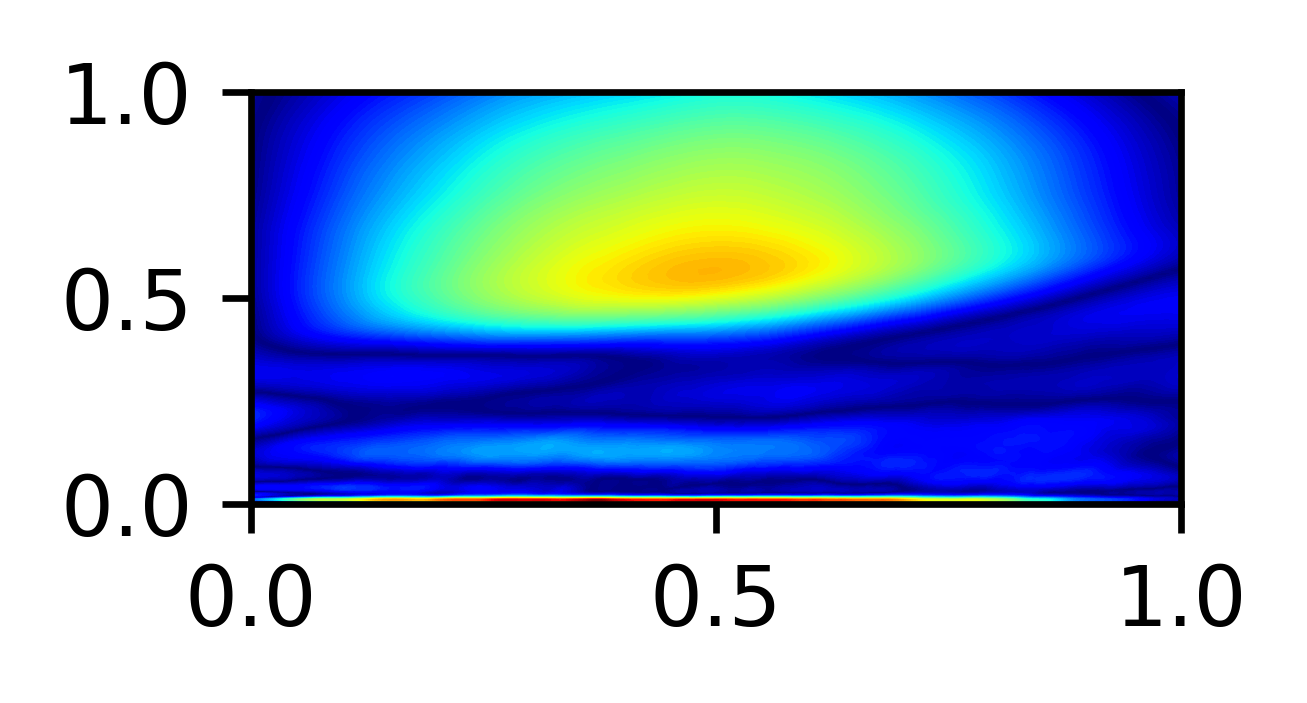

In [8]:
### Contour plots at a given station

fig = plt.figure(figsize=(2,2), dpi=600)
gsp = gridspec.GridSpec(1,1)
ax = fig.add_subplot(2, 1, 1)
lvls = np.linspace(np.min(abs(U-Ugrid)),np.max(abs(U-Ugrid)),100)
cs0 = ax.contourf(Xgrid, Ygrid, np.sqrt((U-Ugrid)**2), levels=lvls, cmap='jet', extend = 'both')

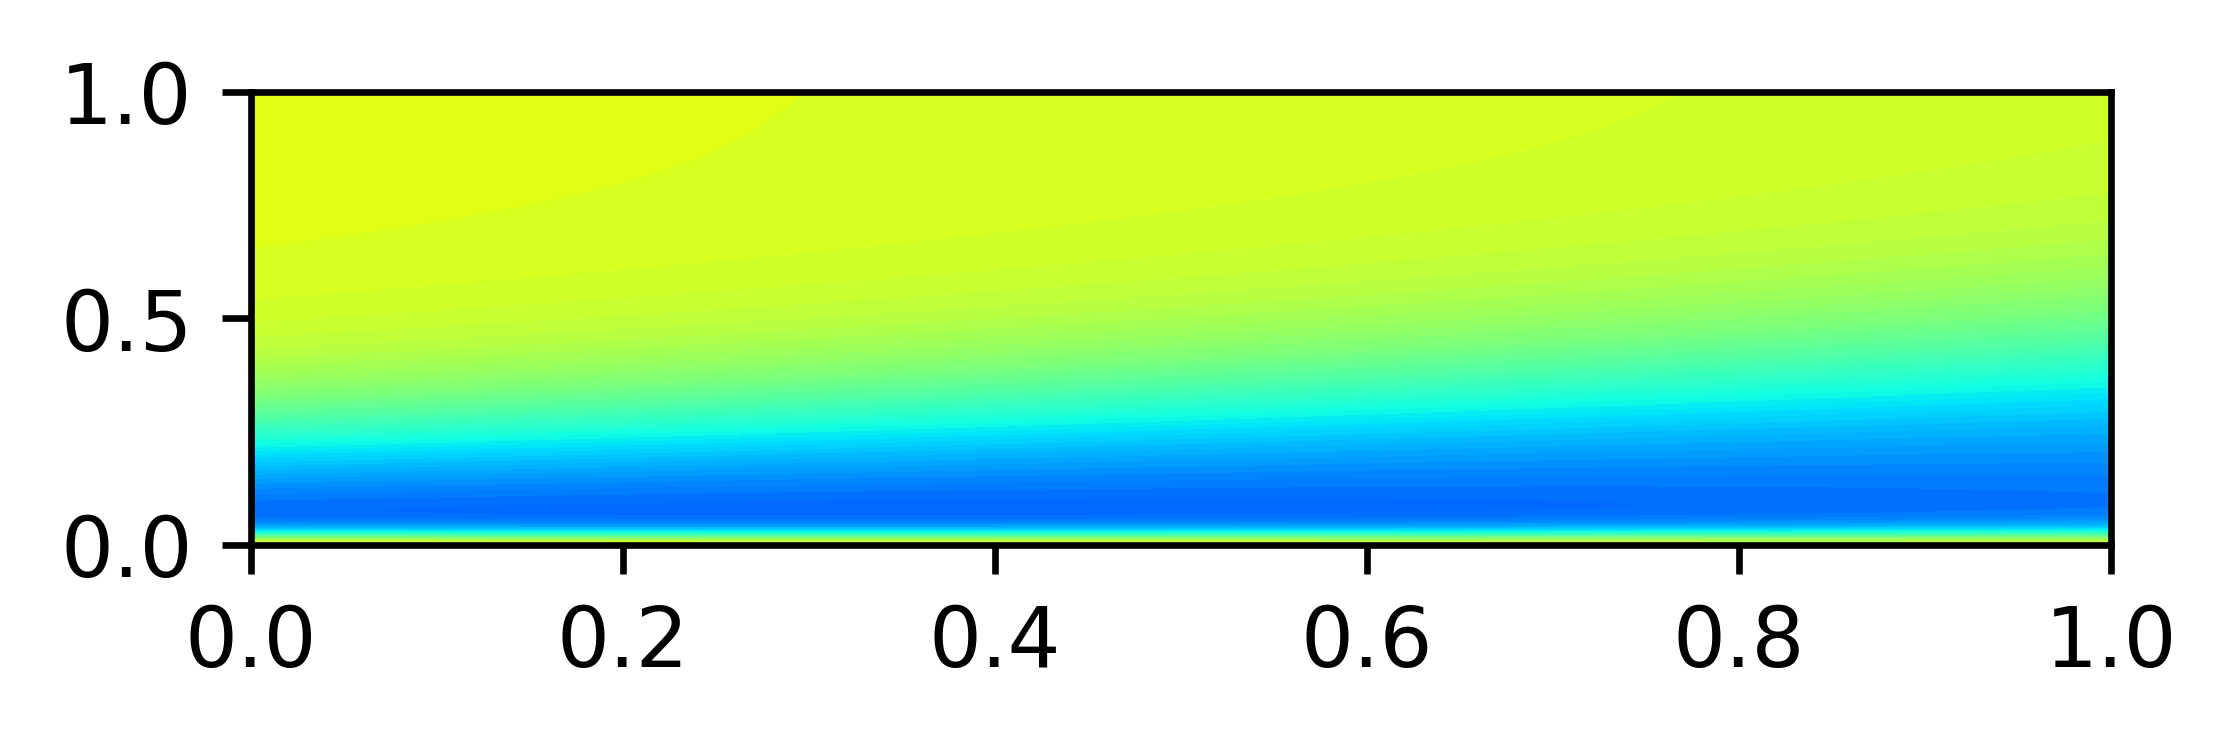

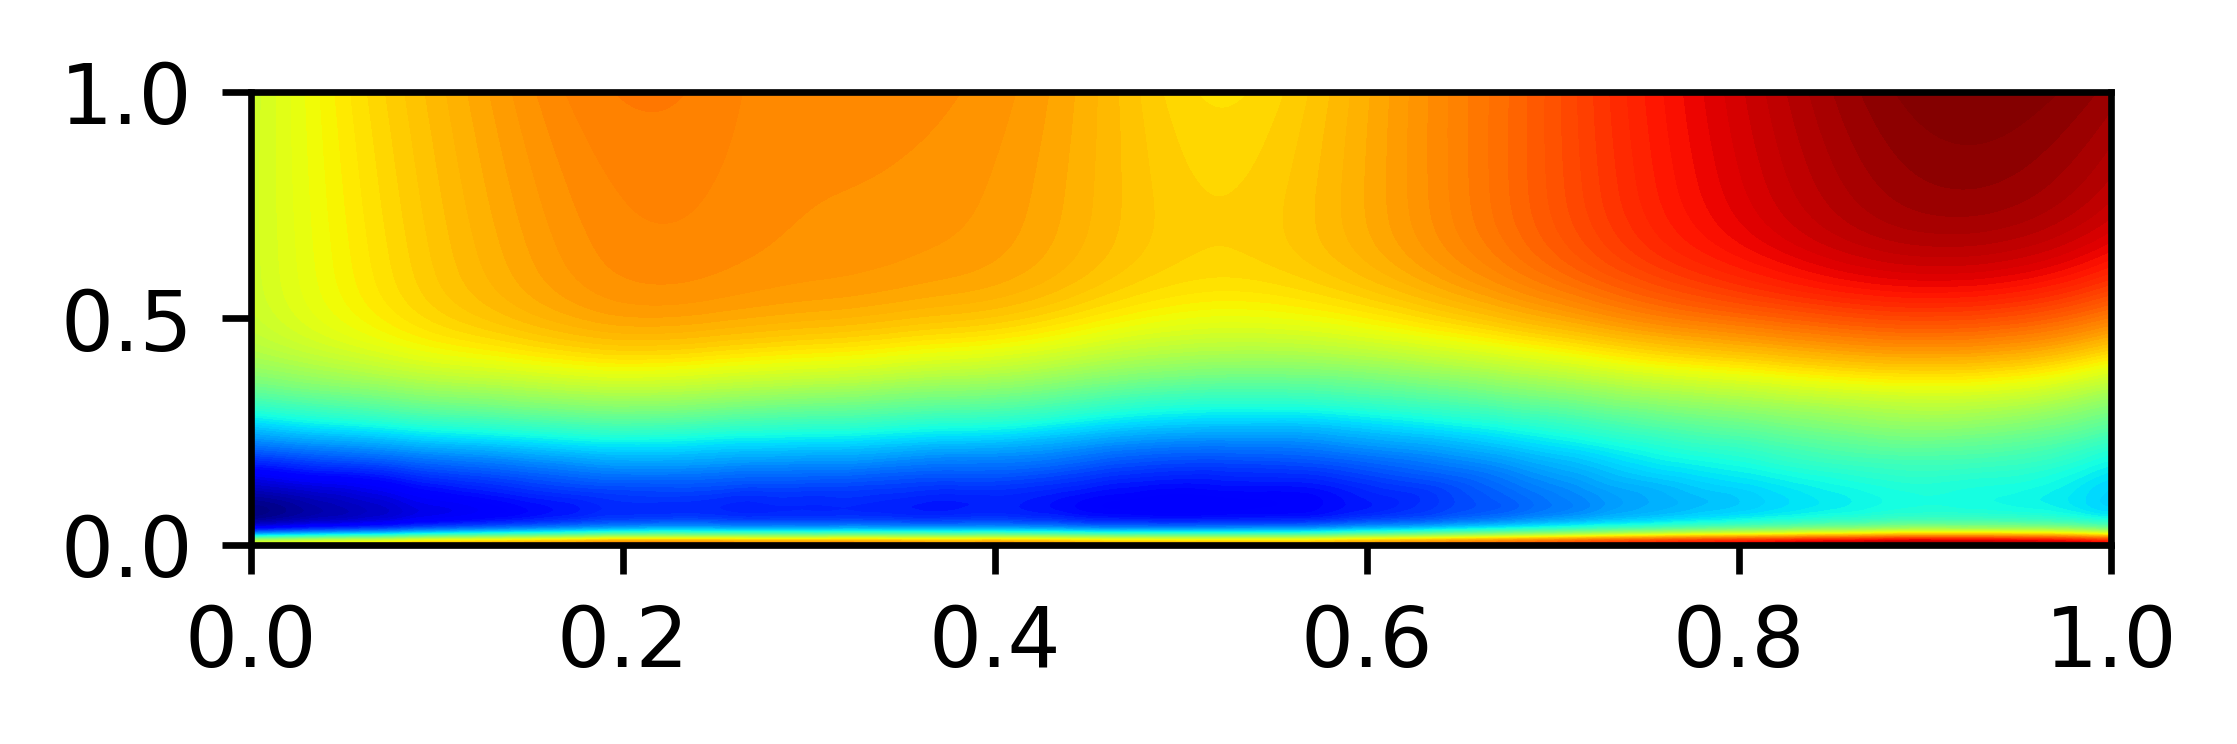

In [7]:
### Contour plots at a given station

mult_factor = np.linalg.norm(P,2)/np.linalg.norm(Pgrid,2)

fig = plt.figure(figsize=(4,2.2), dpi=600)
gsp = gridspec.GridSpec(1,1)
ax = fig.add_subplot(2, 1, 1)
lvls = np.linspace(np.min(P),np.max(P),100)
cs0 = ax.contourf(Xgrid, Ygrid, Pgrid*mult_factor, levels=lvls, cmap='jet', extend = 'both')
### Contour plots at a given station

fig = plt.figure(figsize=(4,2.2), dpi=600)
gsp = gridspec.GridSpec(1,1)
ax = fig.add_subplot(2, 1, 1)
lvls = np.linspace(np.min((P)),np.max((P)),100)
cs0 = ax.contourf(Xgrid, Ygrid, P, levels=lvls, cmap='jet', extend = 'both')